# 흡연유무 분류 모델

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

## 1. 데이터 불러오기 및 확인

In [2]:
pd.set_option('display.max_columns', None)


In [3]:
data=pd.read_csv('C:/Users/wandong/OneDrive/바탕 화면/dongguk/4-2/통계모델링2/기말프로젝트/data/health.csv')

In [4]:
data

,Unnamed: 0,SIDO,SEX,AGE_GROUP,HEIGHT,WEIGHT,WAIST,SIGHT_LEFT,SIGHT_RIGHT,HEAR_LEFT,HEAR_RIGHT,BP_HIGH,BP_LWST,BLDS,TOT_CHOLE,TRIGLYCERIDE,HDL_CHOLE,LDL_CHOLE,HMG,OLIG_PROTE_CD,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,SMK_STAT_TYPE_CD,DRK_YN,CRS_YN,TTR_YN,BMI
0,574476,30,2,16,150,75,98.0,0.0,0.0,1.0,1.0,126.0,70.0,103.0,160.0,100.0,55.0,85.0,12.0,0,0.0,21.0,16.0,15.0,1.0,0.0,0.0,1.0,33.333333
1,574479,47,2,9,160,65,74.0,1.0,1.0,1.0,1.0,110.0,70.0,105.0,203.0,82.0,75.0,112.0,12.0,0,1.0,21.0,16.0,14.0,1.0,1.0,0.0,0.0,25.390625
2,574485,41,1,13,170,70,76.0,1.0,1.0,1.0,1.0,126.0,76.0,96.0,182.0,97.0,86.0,76.0,14.0,0,0.0,21.0,16.0,59.0,3.0,1.0,0.0,0.0,24.221453
3,574486,43,2,12,145,45,70.0,1.0,1.0,1.0,1.0,112.0,72.0,94.0,157.0,103.0,47.0,89.0,14.0,0,0.0,21.0,16.0,19.0,1.0,1.0,0.0,1.0,21.403092
4,574513,44,2,10,155,50,67.0,1.0,1.0,1.0,1.0,120.0,70.0,78.0,214.0,47.0,65.0,139.0,13.0,0,0.0,21.0,16.0,21.0,1.0,1.0,1.0,1.0,20.811655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104431,999514,11,1,18,155,60,85.0,0.0,0.0,2.0,2.0,109.0,55.0,105.0,155.0,118.0,46.0,85.0,12.0,0,1.0,16.0,3.0,23.0,2.0,0.0,0.0,0.0,24.973985
104432,999557,11,1,18,160,55,76.0,0.0,0.0,2.0,2.0,89.0,64.0,134.0,126.0,56.0,46.0,68.0,12.0,0,1.0,15.0,3.0,5.0,1.0,0.0,1.0,1.0,21.484375
104433,999730,11,2,10,155,45,61.0,0.0,0.0,1.0,1.0,114.0,54.0,87.0,200.0,67.0,79.0,107.0,8.0,0,0.0,13.0,2.0,13.0,1.0,0.0,0.0,1.0,18.730489
104434,999888,29,2,11,145,55,79.0,0.0,0.0,1.0,1.0,116.0,75.0,87.0,151.0,113.0,36.0,92.0,10.0,0,0.0,15.0,2.0,13.0,1.0,0.0,0.0,0.0,26.159334


In [5]:
data.describe()

,Unnamed: 0,SIDO,SEX,AGE_GROUP,HEIGHT,WEIGHT,WAIST,SIGHT_LEFT,SIGHT_RIGHT,HEAR_LEFT,HEAR_RIGHT,BP_HIGH,BP_LWST,BLDS,TOT_CHOLE,TRIGLYCERIDE,HDL_CHOLE,LDL_CHOLE,HMG,OLIG_PROTE_CD,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,SMK_STAT_TYPE_CD,DRK_YN,CRS_YN,TTR_YN,BMI
count,104436.000000,104436.000000,104436.000000,104436.000000,104436.000000,104436.000000,104436.000000,104436.000000,104436.000000,104436.000000,104436.000000,104436.000000,104436.000000,104436.000000,104436.000000,104436.000000,104436.000000,104436.000000,104436.000000,104436.000000,104436.000000,104436.000000,104436.000000,104436.000000,104436.000000,104436.000000,104436.000000,104436.000000,104436.000000
mean,767018.428712,33.164656,1.536080,11.616129,161.063666,62.359435,81.135700,0.464447,0.465615,1.053669,1.053468,122.139243,75.261816,99.115343,199.326688,115.302405,56.980371,119.453359,13.608813,0.002183,0.270692,24.467310,22.284615,25.800816,1.491938,0.592717,0.151547,0.501034,23.934795
std,114704.726114,12.638706,0.498699,2.189934,9.037231,11.821194,9.418695,0.506264,0.505133,0.225365,0.224966,14.231790,9.633969,13.289881,39.585288,61.021471,14.049279,35.986833,1.514970,0.046673,0.451566,6.865542,10.345981,14.866859,0.740010,0.491331,0.358583,0.500001,3.441678
min,574476.000000,11.000000,1.000000,9.000000,130.000000,30.000000,50.000000,0.000000,0.000000,1.000000,1.000000,76.000000,36.000000,48.000000,69.000000,7.000000,5.000000,6.000000,7.000000,0.000000,0.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,12.486993
25%,667473.750000,27.000000,1.000000,10.000000,155.000000,55.000000,74.000000,0.000000,0.000000,1.000000,1.000000,112.000000,69.000000,90.000000,172.000000,71.000000,47.000000,94.000000,13.000000,0.000000,0.000000,20.000000,15.000000,15.000000,1.000000,0.000000,0.000000,0.000000,21.484375
50%,762906.500000,41.000000,2.000000,11.000000,160.000000,60.000000,81.000000,0.000000,0.000000,1.000000,1.000000,121.000000,75.000000,97.000000,199.000000,100.000000,55.000000,118.000000,14.000000,0.000000,0.000000,23.000000,20.000000,21.000000,1.000000,1.000000,0.000000,1.000000,23.781213
75%,863700.000000,43.000000,2.000000,13.000000,170.000000,70.000000,87.000000,1.000000,1.000000,1.000000,1.000000,131.000000,81.000000,105.000000,225.000000,144.000000,65.250000,143.000000,15.000000,0.000000,1.000000,28.000000,27.000000,32.000000,2.000000,1.000000,0.000000,1.000000,25.951557
max,999984.000000,49.000000,2.000000,18.000000,195.000000,115.000000,125.000000,2.000000,2.000000,2.000000,2.000000,188.000000,117.000000,150.000000,383.000000,367.000000,119.000000,287.000000,20.000000,1.000000,4.000000,52.000000,63.000000,83.000000,3.000000,1.000000,1.000000,1.000000,47.866805


## 2. raw 데이터 데이터 개형 확인하기

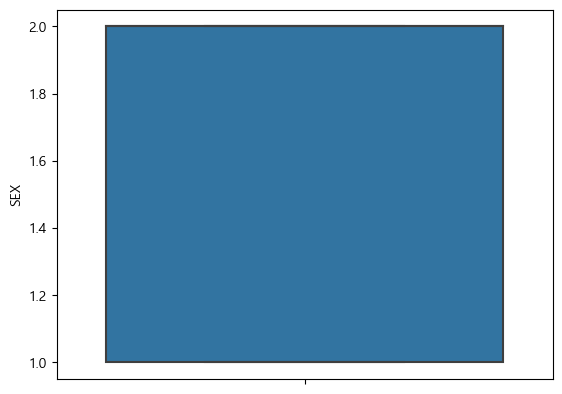

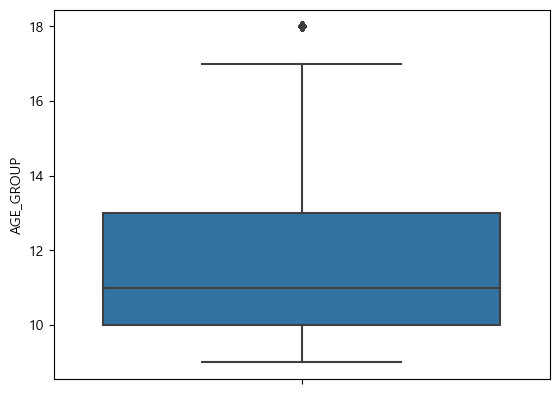

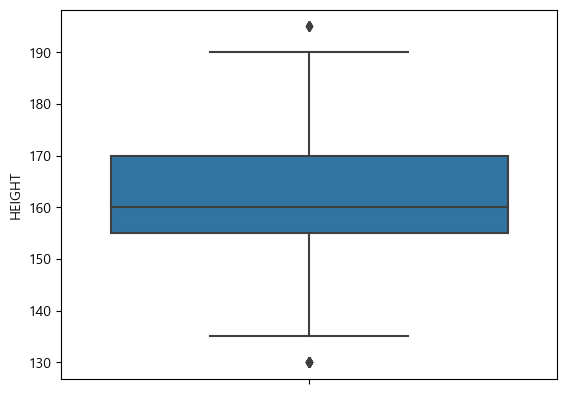

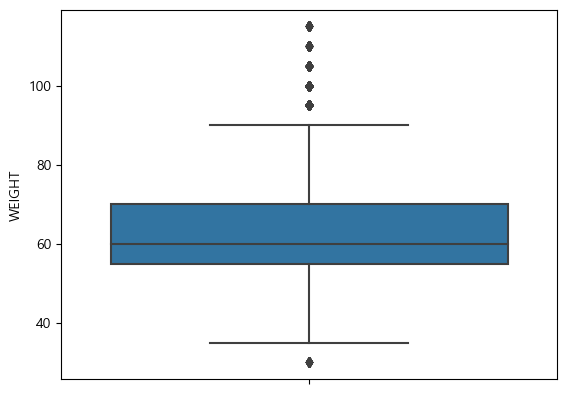

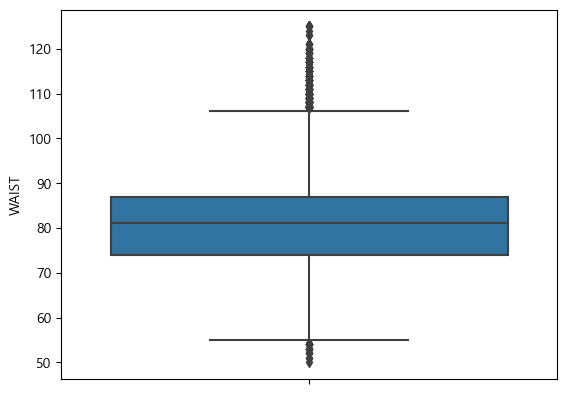

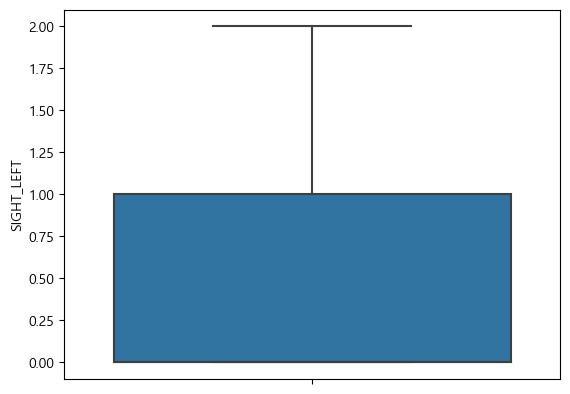

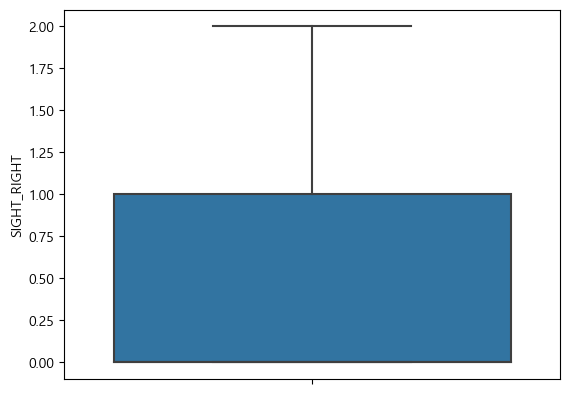

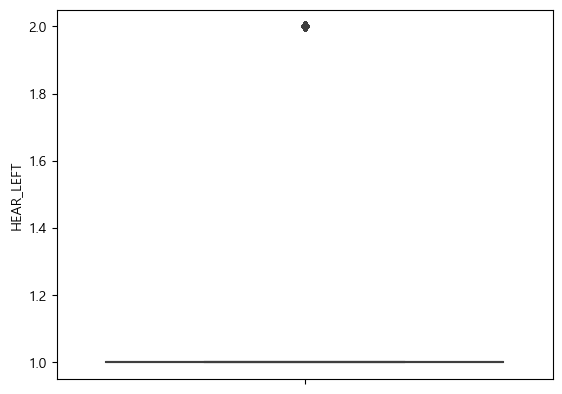

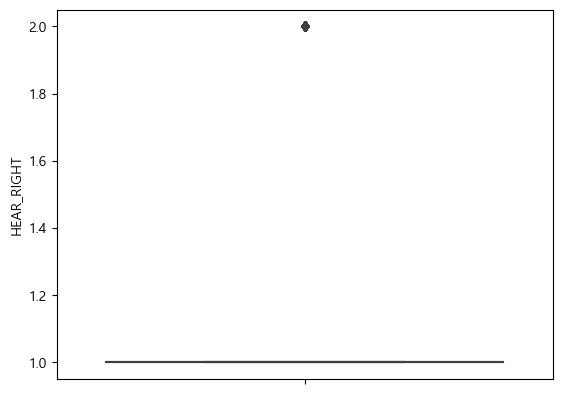

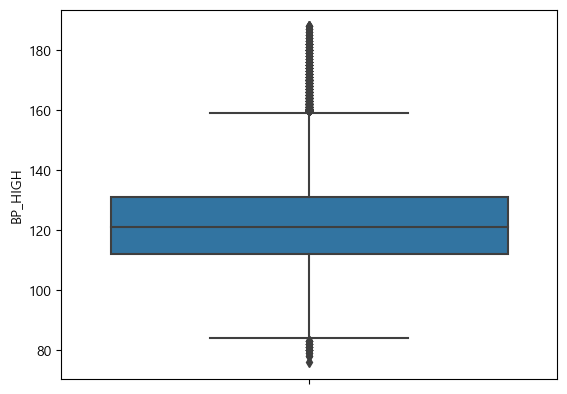

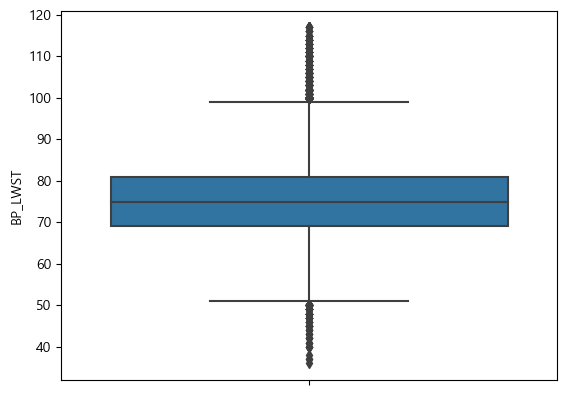

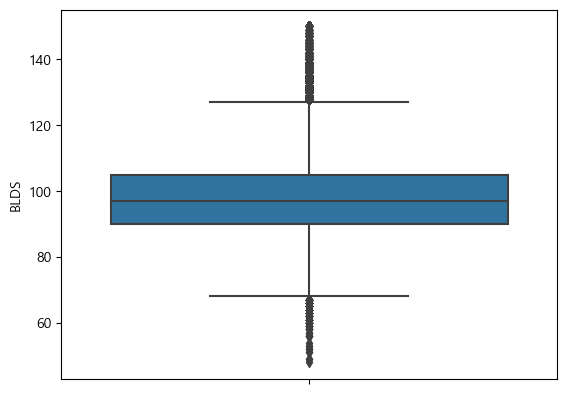

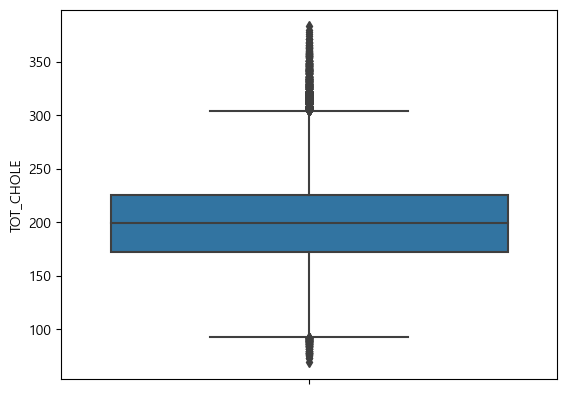

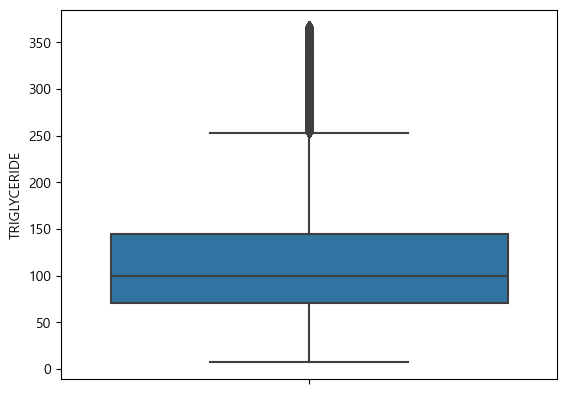

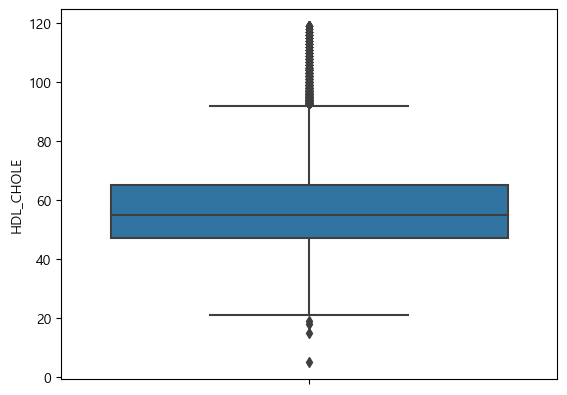

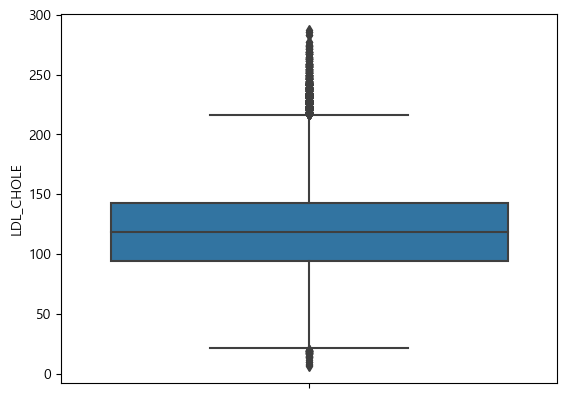

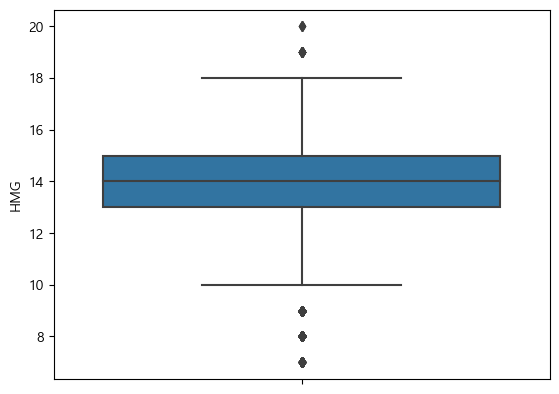

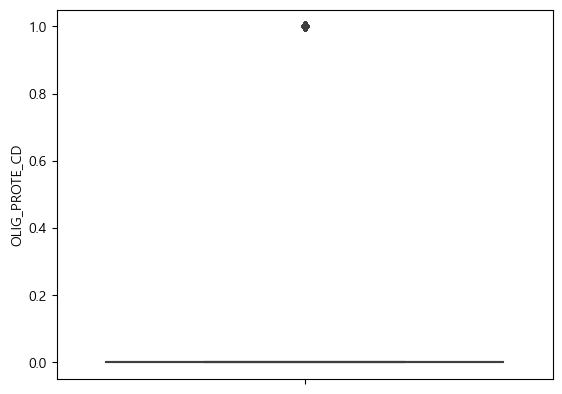

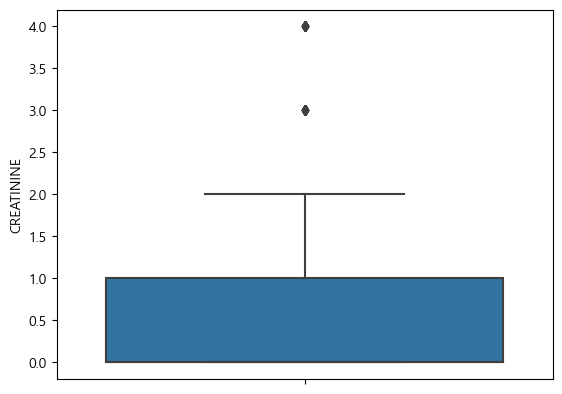

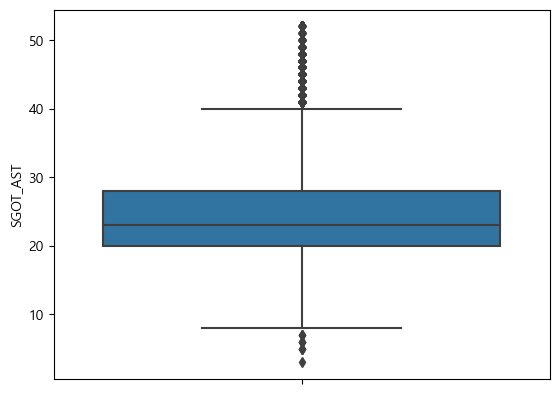

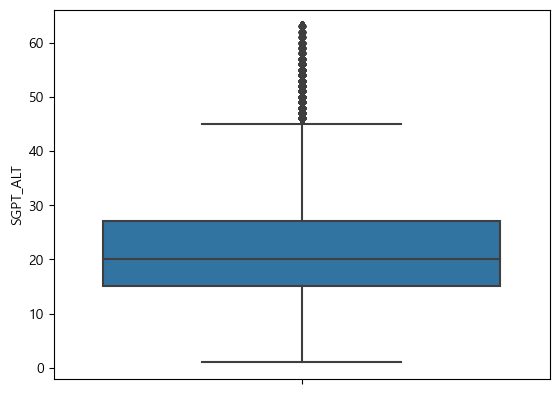

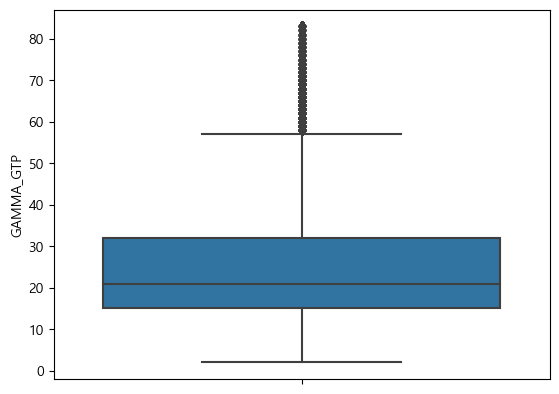

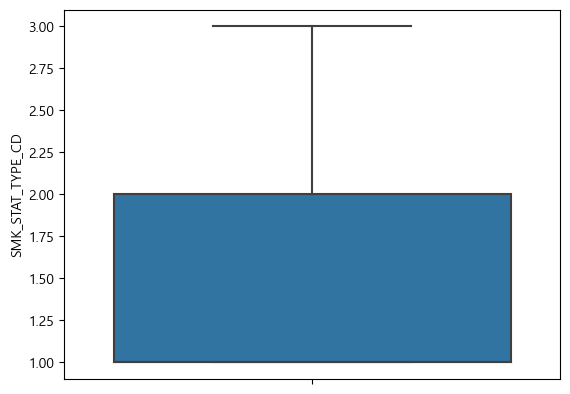

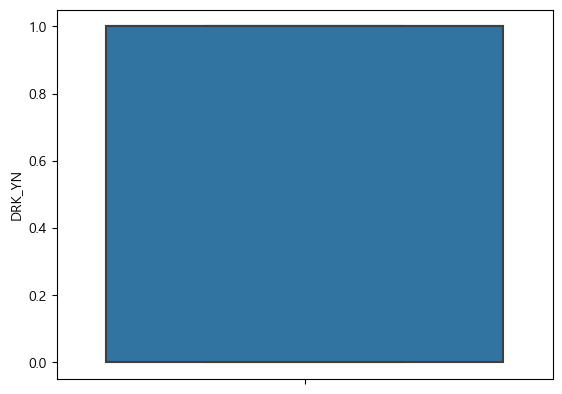

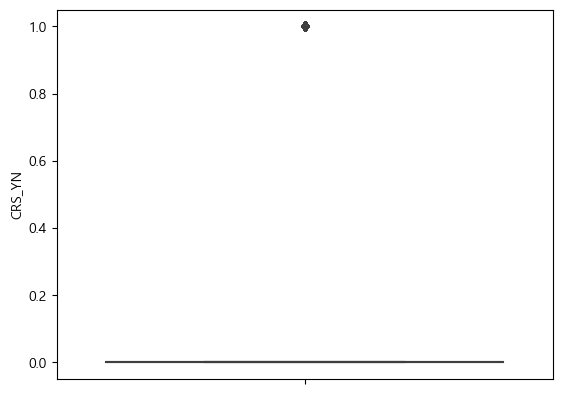

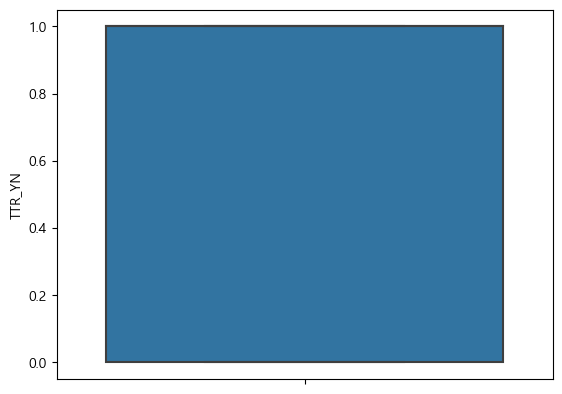

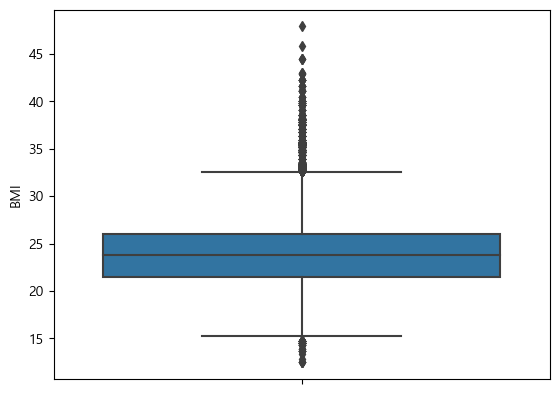

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 위에서 주어진 리스트를 그대로 사용
columns = [ 'SEX', 'AGE_GROUP', 'HEIGHT', 'WEIGHT',
       'WAIST', 'SIGHT_LEFT', 'SIGHT_RIGHT', 'HEAR_LEFT', 'HEAR_RIGHT',
       'BP_HIGH', 'BP_LWST', 'BLDS', 'TOT_CHOLE', 'TRIGLYCERIDE', 'HDL_CHOLE',
       'LDL_CHOLE', 'HMG', 'OLIG_PROTE_CD', 'CREATININE', 'SGOT_AST',
       'SGPT_ALT', 'GAMMA_GTP', 'SMK_STAT_TYPE_CD', 'DRK_YN',
        'CRS_YN', 'TTR_YN','BMI']

# for 문을 사용하여 각각의 boxplot 그리기
for i in columns:
    sns.boxplot(y=i, data=data)
    plt.show()


## 9. index 재정렬 = dataNew4 / 최종데이터 = data


[최종변수]

1. 성별
2. 나이대
3. 허리둘레
4. 시력 좌우(2)
5. 청력 좌우(2)
6. 혈압(수축, 이완)(2)
7. 식전혈당
8. 총콜레스테롤
9. 트리글리세라이드
10. 콜레스테롤(HDL,LDL)(2)
11. 혈색소
12. 요단백
13. 혈청크레아티닌
14. 혈청지오티(AST,ALT)(2)
15. 감마지피티
16. 음주여부
17. 치아우식증(충치)
18. 치석
19. BMI

- 총 24개의 변수

In [7]:
dataNew4=data
dataNew4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104436 entries, 0 to 104435
Data columns (total 29 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        104436 non-null  int64  
 1   SIDO              104436 non-null  int64  
 2   SEX               104436 non-null  int64  
 3   AGE_GROUP         104436 non-null  int64  
 4   HEIGHT            104436 non-null  int64  
 5   WEIGHT            104436 non-null  int64  
 6   WAIST             104436 non-null  float64
 7   SIGHT_LEFT        104436 non-null  float64
 8   SIGHT_RIGHT       104436 non-null  float64
 9   HEAR_LEFT         104436 non-null  float64
 10  HEAR_RIGHT        104436 non-null  float64
 11  BP_HIGH           104436 non-null  float64
 12  BP_LWST           104436 non-null  float64
 13  BLDS              104436 non-null  float64
 14  TOT_CHOLE         104436 non-null  float64
 15  TRIGLYCERIDE      104436 non-null  float64
 16  HDL_CHOLE         10

<Axes: xlabel='AGE_GROUP', ylabel='Count'>

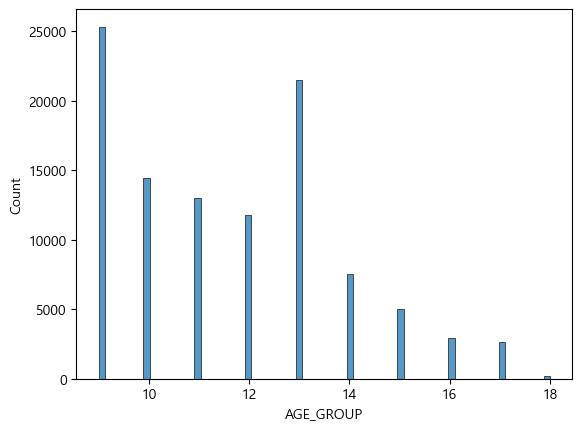

In [8]:
sns.histplot(x=dataNew4['AGE_GROUP'])

In [9]:
age_columns = ['AGE2','AGE3','AGE4','AGE5','AGE6','AGE7','AGE8','AGE9','AGE10']
dataNew4[age_columns]=pd.get_dummies(dataNew4['AGE_GROUP'],drop_first=True)

dataNew4

,Unnamed: 0,SIDO,SEX,AGE_GROUP,HEIGHT,WEIGHT,WAIST,SIGHT_LEFT,SIGHT_RIGHT,HEAR_LEFT,HEAR_RIGHT,BP_HIGH,BP_LWST,BLDS,TOT_CHOLE,TRIGLYCERIDE,HDL_CHOLE,LDL_CHOLE,HMG,OLIG_PROTE_CD,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,SMK_STAT_TYPE_CD,DRK_YN,CRS_YN,TTR_YN,BMI,AGE2,AGE3,AGE4,AGE5,AGE6,AGE7,AGE8,AGE9,AGE10
0,574476,30,2,16,150,75,98.0,0.0,0.0,1.0,1.0,126.0,70.0,103.0,160.0,100.0,55.0,85.0,12.0,0,0.0,21.0,16.0,15.0,1.0,0.0,0.0,1.0,33.333333,0,0,0,0,0,0,1,0,0
1,574479,47,2,9,160,65,74.0,1.0,1.0,1.0,1.0,110.0,70.0,105.0,203.0,82.0,75.0,112.0,12.0,0,1.0,21.0,16.0,14.0,1.0,1.0,0.0,0.0,25.390625,0,0,0,0,0,0,0,0,0
2,574485,41,1,13,170,70,76.0,1.0,1.0,1.0,1.0,126.0,76.0,96.0,182.0,97.0,86.0,76.0,14.0,0,0.0,21.0,16.0,59.0,3.0,1.0,0.0,0.0,24.221453,0,0,0,1,0,0,0,0,0
3,574486,43,2,12,145,45,70.0,1.0,1.0,1.0,1.0,112.0,72.0,94.0,157.0,103.0,47.0,89.0,14.0,0,0.0,21.0,16.0,19.0,1.0,1.0,0.0,1.0,21.403092,0,0,1,0,0,0,0,0,0
4,574513,44,2,10,155,50,67.0,1.0,1.0,1.0,1.0,120.0,70.0,78.0,214.0,47.0,65.0,139.0,13.0,0,0.0,21.0,16.0,21.0,1.0,1.0,1.0,1.0,20.811655,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104431,999514,11,1,18,155,60,85.0,0.0,0.0,2.0,2.0,109.0,55.0,105.0,155.0,118.0,46.0,85.0,12.0,0,1.0,16.0,3.0,23.0,2.0,0.0,0.0,0.0,24.973985,0,0,0,0,0,0,0,0,1
104432,999557,11,1,18,160,55,76.0,0.0,0.0,2.0,2.0,89.0,64.0,134.0,126.0,56.0,46.0,68.0,12.0,0,1.0,15.0,3.0,5.0,1.0,0.0,1.0,1.0,21.484375,0,0,0,0,0,0,0,0,1
104433,999730,11,2,10,155,45,61.0,0.0,0.0,1.0,1.0,114.0,54.0,87.0,200.0,67.0,79.0,107.0,8.0,0,0.0,13.0,2.0,13.0,1.0,0.0,0.0,1.0,18.730489,1,0,0,0,0,0,0,0,0
104434,999888,29,2,11,145,55,79.0,0.0,0.0,1.0,1.0,116.0,75.0,87.0,151.0,113.0,36.0,92.0,10.0,0,0.0,15.0,2.0,13.0,1.0,0.0,0.0,0.0,26.159334,0,1,0,0,0,0,0,0,0


In [10]:
Columns = [ 'SEX', 'AGE2','AGE3','AGE4','AGE5','AGE6','AGE7','AGE8','AGE9','AGE10',
       'WAIST', 'SIGHT_LEFT', 'SIGHT_RIGHT', 'HEAR_LEFT', 'HEAR_RIGHT',
       'BP_HIGH', 'BP_LWST', 'BLDS', 'TOT_CHOLE', 'TRIGLYCERIDE', 'HDL_CHOLE',
       'LDL_CHOLE', 'HMG', 'OLIG_PROTE_CD', 'CREATININE', 'SGOT_AST',
       'SGPT_ALT', 'GAMMA_GTP', 'DRK_YN',
        'CRS_YN', 'TTR_YN','BMI']

data=dataNew4[Columns]

category_columns=['SEX','AGE2','AGE3','AGE4','AGE5','AGE6','AGE7','AGE8','AGE9','AGE10','HEAR_LEFT','HEAR_RIGHT',
                 'OLIG_PROTE_CD','DRK_YN','CRS_YN','TTR_YN']

data[category_columns]=data[category_columns].astype('category')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104436 entries, 0 to 104435
Data columns (total 32 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   SEX            104436 non-null  category
 1   AGE2           104436 non-null  category
 2   AGE3           104436 non-null  category
 3   AGE4           104436 non-null  category
 4   AGE5           104436 non-null  category
 5   AGE6           104436 non-null  category
 6   AGE7           104436 non-null  category
 7   AGE8           104436 non-null  category
 8   AGE9           104436 non-null  category
 9   AGE10          104436 non-null  category
 10  WAIST          104436 non-null  float64 
 11  SIGHT_LEFT     104436 non-null  float64 
 12  SIGHT_RIGHT    104436 non-null  float64 
 13  HEAR_LEFT      104436 non-null  category
 14  HEAR_RIGHT     104436 non-null  category
 15  BP_HIGH        104436 non-null  float64 
 16  BP_LWST        104436 non-null  float64 
 17  BLDS      

C:\Users\wandong\AppData\Local\Temp\ipykernel_14072\718959777.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[category_columns]=data[category_columns].astype('category')


In [11]:
target=dataNew4.iloc[:,24:25]
target=target.astype('category')
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104436 entries, 0 to 104435
Data columns (total 1 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   SMK_STAT_TYPE_CD  104436 non-null  category
dtypes: category(1)
memory usage: 102.2 KB


## 10. 데이터나누기 (8:2)

In [12]:
from sklearn.model_selection import train_test_split

x_train,x_test,Y_train,Y_test=train_test_split(data,target,test_size=0.2,random_state=3535)
x_train

,SEX,AGE2,AGE3,AGE4,AGE5,AGE6,AGE7,AGE8,AGE9,AGE10,WAIST,SIGHT_LEFT,SIGHT_RIGHT,HEAR_LEFT,HEAR_RIGHT,BP_HIGH,BP_LWST,BLDS,TOT_CHOLE,TRIGLYCERIDE,HDL_CHOLE,LDL_CHOLE,HMG,OLIG_PROTE_CD,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,DRK_YN,CRS_YN,TTR_YN,BMI
8049,2,0,0,0,1,0,0,0,0,0,75.0,1.0,1.0,1.0,1.0,106.0,65.0,81.0,198.0,223.0,50.0,102.0,13.0,0,0.0,19.0,17.0,18.0,1.0,0.0,0.0,23.437500
72760,1,0,0,0,0,0,0,0,0,0,93.0,1.0,1.0,1.0,1.0,110.0,68.0,103.0,204.0,126.0,55.0,124.0,15.0,0,0.0,18.0,27.0,32.0,1.0,0.0,0.0,25.711662
5368,2,0,1,0,0,0,0,0,0,0,70.0,1.0,1.0,1.0,1.0,116.0,76.0,98.0,223.0,54.0,63.0,149.0,14.0,0,0.0,14.0,16.0,13.0,1.0,0.0,0.0,21.484375
57501,2,0,0,0,1,0,0,0,0,0,82.0,0.0,0.0,1.0,1.0,117.0,73.0,102.0,234.0,143.0,44.0,161.0,12.0,0,0.0,33.0,23.0,24.0,1.0,0.0,1.0,22.892820
101191,1,0,0,0,1,0,0,0,0,0,90.0,0.0,0.0,1.0,1.0,128.0,89.0,108.0,238.0,78.0,45.0,177.0,14.0,0,0.0,45.0,50.0,31.0,1.0,0.0,0.0,29.384757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31112,2,1,0,0,0,0,0,0,0,0,71.0,0.0,0.0,1.0,1.0,116.0,64.0,84.0,186.0,93.0,57.0,110.0,12.0,0,0.0,18.0,19.0,18.0,1.0,1.0,1.0,19.531250
88366,2,0,1,0,0,0,0,0,0,0,100.0,1.0,0.0,1.0,1.0,123.0,60.0,101.0,250.0,145.0,42.0,179.0,13.0,0,0.0,29.0,34.0,25.0,1.0,1.0,1.0,35.555556
64765,2,1,0,0,0,0,0,0,0,0,86.0,1.0,1.0,1.0,1.0,130.0,81.0,100.0,243.0,80.0,63.0,164.0,13.0,0,0.0,18.0,11.0,11.0,1.0,0.0,1.0,22.038567
53351,2,0,0,0,0,0,0,0,0,0,64.0,0.0,0.0,1.0,1.0,115.0,63.0,85.0,166.0,54.0,71.0,84.0,12.0,0,0.0,15.0,12.0,19.0,0.0,0.0,1.0,18.365473


In [13]:
Y_train

,SMK_STAT_TYPE_CD
8049,1.0
72760,3.0
5368,1.0
57501,3.0
101191,2.0
...,...
31112,1.0
88366,1.0
64765,1.0
53351,1.0


## SVM
- svm 은 단위에 민감하므로 스케일링

In [14]:
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


columns_to_scale=['WAIST','BP_HIGH','BP_LWST','BLDS','TOT_CHOLE',
                  'TRIGLYCERIDE','HDL_CHOLE','LDL_CHOLE','HMG',
                  'CREATININE','GAMMA_GTP','SGOT_AST','SGPT_ALT']

x_train[columns_to_scale]=scaler.fit_transform(x_train[columns_to_scale])
# scaler.fit(x_train)
# x_train_scaled = scaler.transform(x_train)
# x_train_scaled = pd.DataFrame(x_train_scaled,columns=x_train.columns,index=list(x_train.index.values))

x_train

,SEX,AGE2,AGE3,AGE4,AGE5,AGE6,AGE7,AGE8,AGE9,AGE10,WAIST,SIGHT_LEFT,SIGHT_RIGHT,HEAR_LEFT,HEAR_RIGHT,BP_HIGH,BP_LWST,BLDS,TOT_CHOLE,TRIGLYCERIDE,HDL_CHOLE,LDL_CHOLE,HMG,OLIG_PROTE_CD,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,DRK_YN,CRS_YN,TTR_YN,BMI
8049,2,0,0,0,1,0,0,0,0,0,-0.651233,1.0,1.0,1.0,1.0,-1.134424,-1.065061,-1.362809,-0.033309,1.763895,-0.495749,-0.485738,-0.403923,0,-0.597993,-0.795105,-0.510222,-0.525105,1.0,0.0,0.0,23.437500
72760,1,0,0,0,0,0,0,0,0,0,1.258160,1.0,1.0,1.0,1.0,-0.853430,-0.753838,0.290842,0.118437,0.174464,-0.139752,0.126362,0.916381,0,-0.597993,-0.941116,0.457169,0.416522,1.0,0.0,0.0,25.711662
5368,2,0,1,0,0,0,0,0,0,0,-1.181620,1.0,1.0,1.0,1.0,-0.431938,0.076090,-0.084988,0.598969,-1.005320,0.429843,0.821930,0.256229,0,-0.597993,-1.525162,-0.606961,-0.861400,1.0,0.0,0.0,21.484375
57501,2,0,0,0,1,0,0,0,0,0,0.091309,0.0,0.0,1.0,1.0,-0.361689,-0.235133,0.215676,0.877171,0.453024,-0.922945,1.155803,-1.064075,0,-0.597993,1.249053,0.070213,-0.121551,1.0,0.0,1.0,22.892820
101191,1,0,0,0,1,0,0,0,0,0,0.939928,0.0,0.0,1.0,1.0,0.411045,1.424722,0.666672,0.978336,-0.612058,-0.851746,1.600967,0.256229,0,-0.597993,3.001188,2.682169,0.349263,1.0,0.0,0.0,29.384757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31112,2,1,0,0,0,0,0,0,0,0,-1.075542,0.0,0.0,1.0,1.0,-0.431938,-1.168802,-1.137311,-0.336803,-0.366270,0.002647,-0.263156,-1.064075,0,-0.597993,-0.941116,-0.316743,-0.525105,1.0,1.0,1.0,19.531250
88366,2,0,1,0,0,0,0,0,0,0,2.000701,1.0,0.0,1.0,1.0,0.059802,-1.583765,0.140510,1.281829,0.485796,-1.065344,1.656613,-0.403923,0,-0.597993,0.665008,1.134343,-0.054292,1.0,1.0,1.0,35.555556
64765,2,1,0,0,0,0,0,0,0,0,0.515618,1.0,1.0,1.0,1.0,0.551543,0.594794,0.065344,1.104792,-0.579287,0.429843,1.239271,-0.403923,0,-0.597993,-0.941116,-1.090656,-0.995918,1.0,0.0,1.0,22.038567
53351,2,0,0,0,0,0,0,0,0,0,-1.818084,0.0,0.0,1.0,1.0,-0.502187,-1.272543,-1.062145,-0.842626,-1.005320,0.999438,-0.986548,-1.064075,0,-0.597993,-1.379150,-0.993917,-0.457846,0.0,0.0,1.0,18.365473


In [15]:
x_train

,SEX,AGE2,AGE3,AGE4,AGE5,AGE6,AGE7,AGE8,AGE9,AGE10,WAIST,SIGHT_LEFT,SIGHT_RIGHT,HEAR_LEFT,HEAR_RIGHT,BP_HIGH,BP_LWST,BLDS,TOT_CHOLE,TRIGLYCERIDE,HDL_CHOLE,LDL_CHOLE,HMG,OLIG_PROTE_CD,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,DRK_YN,CRS_YN,TTR_YN,BMI
8049,2,0,0,0,1,0,0,0,0,0,-0.651233,1.0,1.0,1.0,1.0,-1.134424,-1.065061,-1.362809,-0.033309,1.763895,-0.495749,-0.485738,-0.403923,0,-0.597993,-0.795105,-0.510222,-0.525105,1.0,0.0,0.0,23.437500
72760,1,0,0,0,0,0,0,0,0,0,1.258160,1.0,1.0,1.0,1.0,-0.853430,-0.753838,0.290842,0.118437,0.174464,-0.139752,0.126362,0.916381,0,-0.597993,-0.941116,0.457169,0.416522,1.0,0.0,0.0,25.711662
5368,2,0,1,0,0,0,0,0,0,0,-1.181620,1.0,1.0,1.0,1.0,-0.431938,0.076090,-0.084988,0.598969,-1.005320,0.429843,0.821930,0.256229,0,-0.597993,-1.525162,-0.606961,-0.861400,1.0,0.0,0.0,21.484375
57501,2,0,0,0,1,0,0,0,0,0,0.091309,0.0,0.0,1.0,1.0,-0.361689,-0.235133,0.215676,0.877171,0.453024,-0.922945,1.155803,-1.064075,0,-0.597993,1.249053,0.070213,-0.121551,1.0,0.0,1.0,22.892820
101191,1,0,0,0,1,0,0,0,0,0,0.939928,0.0,0.0,1.0,1.0,0.411045,1.424722,0.666672,0.978336,-0.612058,-0.851746,1.600967,0.256229,0,-0.597993,3.001188,2.682169,0.349263,1.0,0.0,0.0,29.384757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31112,2,1,0,0,0,0,0,0,0,0,-1.075542,0.0,0.0,1.0,1.0,-0.431938,-1.168802,-1.137311,-0.336803,-0.366270,0.002647,-0.263156,-1.064075,0,-0.597993,-0.941116,-0.316743,-0.525105,1.0,1.0,1.0,19.531250
88366,2,0,1,0,0,0,0,0,0,0,2.000701,1.0,0.0,1.0,1.0,0.059802,-1.583765,0.140510,1.281829,0.485796,-1.065344,1.656613,-0.403923,0,-0.597993,0.665008,1.134343,-0.054292,1.0,1.0,1.0,35.555556
64765,2,1,0,0,0,0,0,0,0,0,0.515618,1.0,1.0,1.0,1.0,0.551543,0.594794,0.065344,1.104792,-0.579287,0.429843,1.239271,-0.403923,0,-0.597993,-0.941116,-1.090656,-0.995918,1.0,0.0,1.0,22.038567
53351,2,0,0,0,0,0,0,0,0,0,-1.818084,0.0,0.0,1.0,1.0,-0.502187,-1.272543,-1.062145,-0.842626,-1.005320,0.999438,-0.986548,-1.064075,0,-0.597993,-1.379150,-0.993917,-0.457846,0.0,0.0,1.0,18.365473


In [16]:
import time
start = time.time()

svm_clf=SVC(kernel='poly',C=3,degree=3)
svm_clf.fit(x_train,Y_train)

print(f"{time.time()-start:.4f} sec")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1222.2881 sec


In [17]:
# scaler=StandardScaler()
# scaler.fit(x_train)
# x_test_scaled = scaler.transform(x_test)
# x_test_scaled = pd.DataFrame(x_test,columns=x_test.columns,index=list(x_test.index.values))

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


columns_to_scale=['WAIST','BP_HIGH','BP_LWST','BLDS','TOT_CHOLE',
                  'TRIGLYCERIDE','HDL_CHOLE','LDL_CHOLE','HMG',
                  'CREATININE','GAMMA_GTP','SGOT_AST','SGPT_ALT']

x_test[columns_to_scale]=scaler.fit_transform(x_test[columns_to_scale])
# scaler.fit(x_train)
# x_train_scaled = scaler.transform(x_train)
# x_train_scaled = pd.DataFrame(x_train_scaled,columns=x_train.columns,index=list(x_train.index.values))

x_test

,SEX,AGE2,AGE3,AGE4,AGE5,AGE6,AGE7,AGE8,AGE9,AGE10,WAIST,SIGHT_LEFT,SIGHT_RIGHT,HEAR_LEFT,HEAR_RIGHT,BP_HIGH,BP_LWST,BLDS,TOT_CHOLE,TRIGLYCERIDE,HDL_CHOLE,LDL_CHOLE,HMG,OLIG_PROTE_CD,CREATININE,SGOT_AST,SGPT_ALT,GAMMA_GTP,DRK_YN,CRS_YN,TTR_YN,BMI
67345,2,0,0,0,0,0,0,0,0,0,-1.717834,1.0,0.0,1.0,1.0,-0.569802,-0.025272,0.222619,-0.662998,-0.345957,1.915988,-1.366871,-0.393661,0,-0.605313,-0.080003,-1.091041,-0.590437,1.0,0.0,1.0,16.649324
71480,1,1,0,0,0,0,0,0,0,0,1.052591,1.0,1.0,1.0,1.0,-0.429135,0.390876,-0.910896,0.242281,0.408229,-1.496603,0.706932,1.585827,0,1.608620,0.497088,0.450214,1.899076,1.0,0.0,1.0,27.681661
20882,2,0,1,0,0,0,0,0,0,0,-0.652286,0.0,0.0,1.0,1.0,-0.780804,-1.377752,-0.457490,-0.034332,-0.985376,0.565171,0.043315,-0.393661,0,-0.605313,0.352815,-0.416742,-0.657721,0.0,0.0,1.0,22.892820
58602,2,0,0,0,0,1,0,0,0,0,0.306707,1.0,1.0,1.0,1.0,-0.147799,-0.337383,2.187378,-0.587559,-0.198399,-0.145786,-0.537350,0.266168,0,-0.605313,-0.080003,0.161228,-0.254016,0.0,0.0,1.0,28.061224
54553,2,0,0,0,1,0,0,0,0,0,0.413262,0.0,0.0,1.0,1.0,-0.921471,-0.961604,0.222619,2.178573,1.900206,-0.927838,2.117118,-1.053491,0,-0.605313,-0.080003,0.064900,-0.119448,0.0,0.0,1.0,24.973985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60036,1,0,0,0,0,1,0,0,0,0,-0.226067,1.0,0.0,1.0,1.0,2.243550,1.743355,0.751592,0.418307,0.916485,-0.145786,0.209219,0.925998,0,-0.605313,0.497088,0.161228,-0.455869,0.0,0.0,0.0,22.038567
78420,2,0,0,0,0,0,1,0,0,0,1.159146,0.0,0.0,1.0,1.0,2.454552,1.951429,1.582836,1.097267,0.998462,0.351884,0.734583,0.266168,0,-0.605313,0.497088,0.642871,0.687961,0.0,0.0,0.0,30.915577
22592,2,0,0,0,0,0,0,0,0,0,-0.758841,0.0,1.0,1.0,1.0,0.625873,1.119134,-0.986464,-0.235505,-0.624678,0.351884,-0.177891,-1.053491,0,-0.605313,-0.801368,-0.802056,-0.994142,1.0,0.0,1.0,18.730489
45462,2,1,0,0,0,0,0,0,0,0,0.839481,1.0,1.0,1.0,1.0,0.063202,1.015097,-0.230787,0.116548,-0.706655,1.062840,-0.039637,-0.393661,0,-0.605313,0.785634,-0.127757,-0.725005,1.0,1.0,1.0,27.343750


In [18]:
from sklearn.metrics import accuracy_score
Y_pred=svm_clf.predict(x_test)
accuracy_score(Y_test,Y_pred)

0.7140463423975488

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,Y_pred)

array([[11690,  1590,   487],
       [ 1170,  2214,   634],
       [  799,  1293,  1011]], dtype=int64)

In [22]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

         1.0       0.86      0.85      0.85     13767
         2.0       0.43      0.55      0.49      4018
         3.0       0.47      0.33      0.39      3103

    accuracy                           0.71     20888
   macro avg       0.59      0.58      0.57     20888
weighted avg       0.72      0.71      0.71     20888

